In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [30]:
#Загрузка датасета
data=pd.read_csv("winequality.csv", delimiter=',', encoding='UTF-8')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


In [31]:
vals = data["color"].unique()
vals

array(['red', 'white'], dtype=object)

In [32]:
cols_for_clusters = ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df= data[cols_for_clusters].copy()


In [33]:
X = df
y = data['color'].replace(vals, [0,1])

<ipython-input-33-d0e36153980c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['color'].replace(vals, [0,1])


Метод главных компонентов (Principal Component Analysis, PCA)

[[-84.11070093  -0.15307185]
 [-48.77898534   5.83931247]
 [-63.73412983  -0.88422158]
 ...
 [ -4.89623778   0.51018811]
 [ -8.18915831  -8.962025  ]
 [-19.40399275  -4.26038667]]


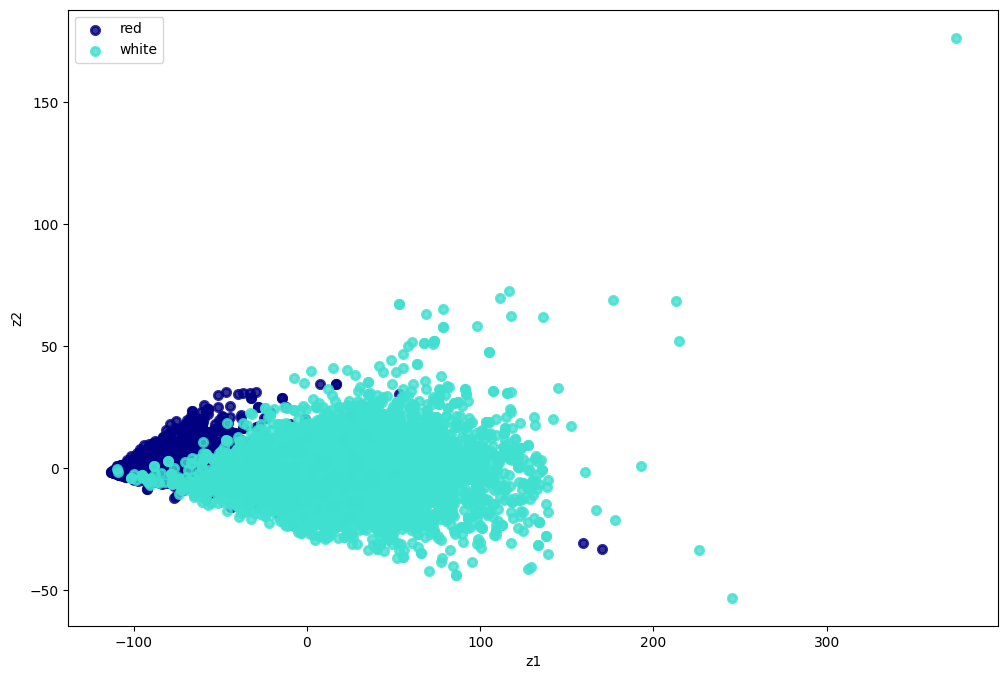

In [35]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA  # Импортируем класс PCA для уменьшения размерности

# Создаем объект PCA, указывая, что хотим уменьшить размерность до 2 компонентов
pca = PCA(n_components=2)
# Обучаем модель PCA на данных X и преобразуем данные в новое пространство
X_new = pca.fit(X).transform(X)
print(X_new)

# Создаем новое окно для графика с указанными размерами
plt.figure(figsize=(12,8))
# Задаем цвета для визуализации различных классов
colors = ["navy", "turquoise", "darkorange"]
lw = 2  # Задаем толщину линий для графиков


# Проходим по каждому цвету, индексу класса и имени класса
for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    # Строим рассеянный график для текущего класса
    plt.scatter(
        X_new[y == i, 0],  # Данные для оси X для класса i
        X_new[y == i, 1],  # Данные для оси Y для класса i
        color=color,       # Задаем цвет точек
        alpha=0.8,        # Устанавливаем прозрачность точек
        lw=lw,            # Задаем толщину линий
        label=vals[i]    # Добавляем подпись для легенды
    )

# Отображаем легенду на графике
plt.legend(loc="best", shadow=False, scatterpoints=1)
# Подписываем ось X
plt.xlabel("z1")
# Подписываем ось Y
plt.ylabel("z2")
# Отображаем финальный график на экране
plt.show()

In [36]:
pca.explained_variance_ratio_

array([0.95355286, 0.04062238])

In [ ]:
# Как вы можете видеть выше, первые главные компоненты сохраняют 95% дисперсии набора данных, тогда как вторые главные компоненты
# сохраняют только  4% дисперсии.
# Это указывает на то, что мы, получим хороший результат. 99 процентов дисперсии объясняется двумя новыми переменными

Независисый анализ компонентов (Independent Component Analysis, ICA)

In [37]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

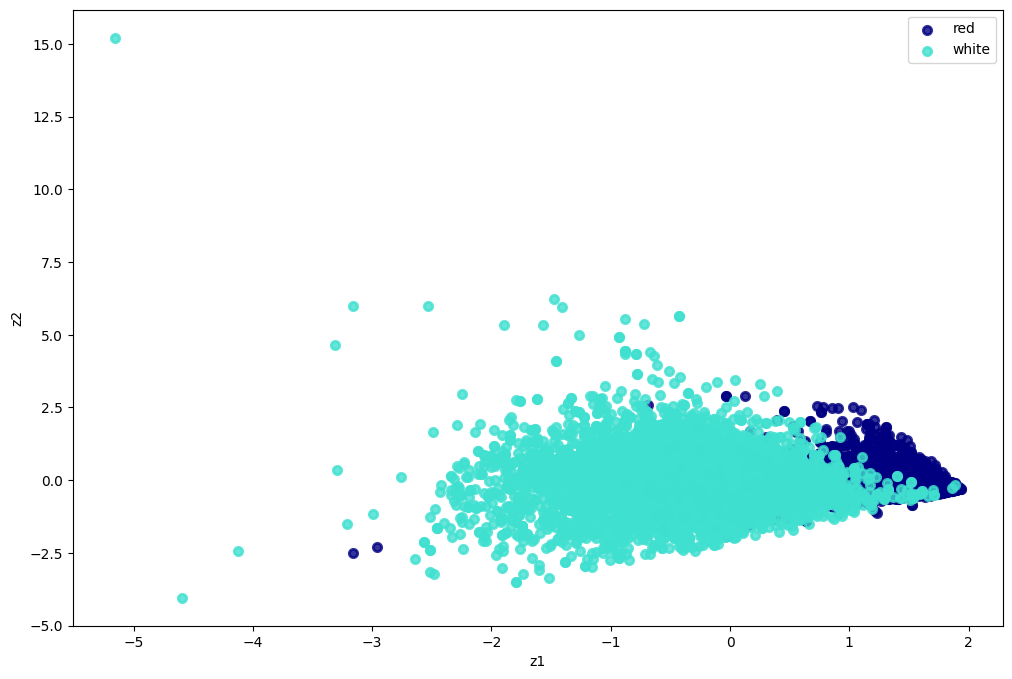

In [38]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Kernel PCA

In [39]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

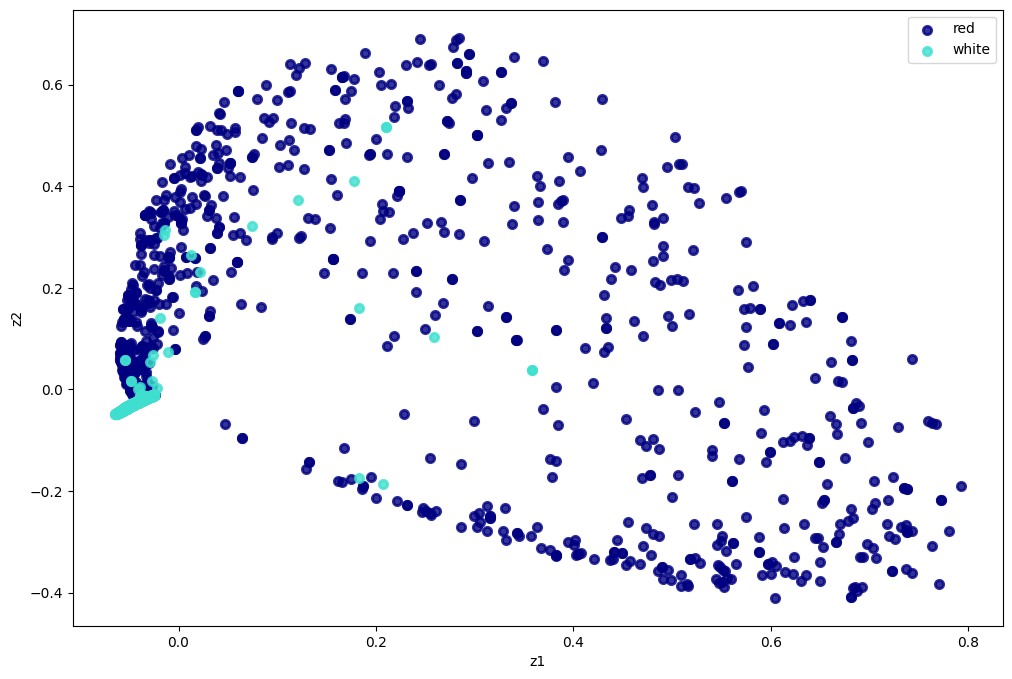

In [41]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [46]:
from sklearn.decomposition import KernelPCA

sigmoid_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.04)
X_new = sigmoid_pca.fit_transform(X)

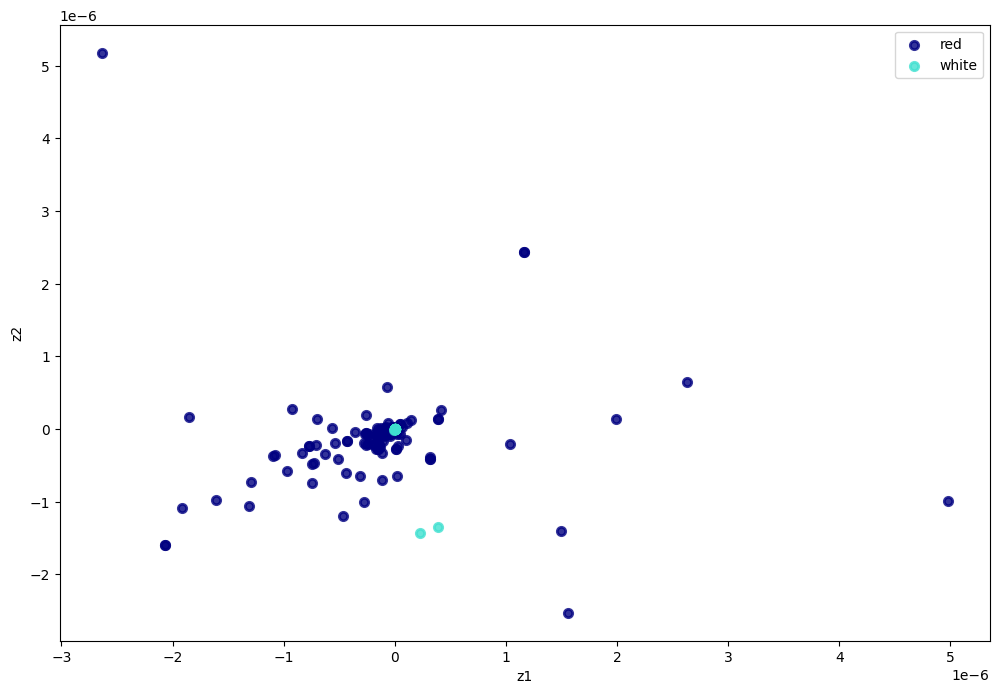

In [47]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [49]:
from sklearn.decomposition import KernelPCA

poly_pca = KernelPCA(n_components=2, kernel='poly', gamma=0.04)
X_new = poly_pca.fit_transform(X)

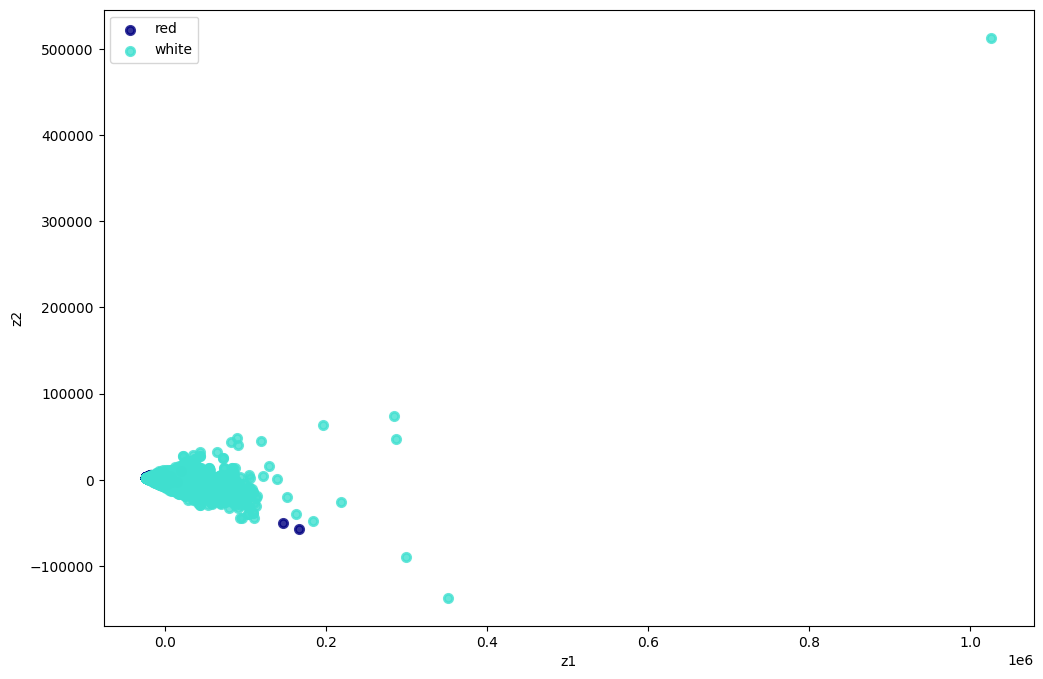

In [50]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

tSNE

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [52]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (6497, 12)
New Shape of X:  (6497, 2)
Kullback-Leibler divergence after optimization:  0.8577793836593628
No. of iterations:  999
Embedding vectors:  [[-78.273605    4.428649 ]
 [-46.343693   45.454475 ]
 [-73.862595   35.27458  ]
 ...
 [-13.465612  -16.760612 ]
 [-23.581055  -19.852243 ]
 [-32.477093   -4.4854693]]


In [ ]:
'''
    **Kullback-Leibler divergence after optimization**:
   - Эта метрика измеряет разницу между двумя вероятностными распределениями: распределением точек в исходном пространстве и распределением
    точек в новом пространстве.

    Чем меньше значение KL-дивергенции, тем лучше t-SNE справляется с сохранением структурных отношений между точками в новых координатах по
    сравнению с исходными. Это означает, что точки, которые были близки в высокоразмерном пространстве, также будут близки в низкоразмерном,
    что является основной целью t-SNE.

    0.8577793836593628 - плохой показатель


    **No. of iterations**:
   - Это число итераций, которые алгоритм выполнил в процессе оптимизации. t-SNE использует итеративный процесс для нахождения наилучшего
     представления данных.
   - Это значение важно для оценки скорости сходимости алгоритма и может помочь в выборе параметров для будущих запусков, если результат
     кажется незадовлетворительным.

    **Embedding vectors**:
   - Он показывает  матрицу встраивания (embedding), т.е. новые координаты (векторы) для каждого объекта.
   - Эти векторы используются для визуализации данных и могут быть анализированы для оценки того, как t-SNE группирует похожие объекты в новом пространстве.

'''

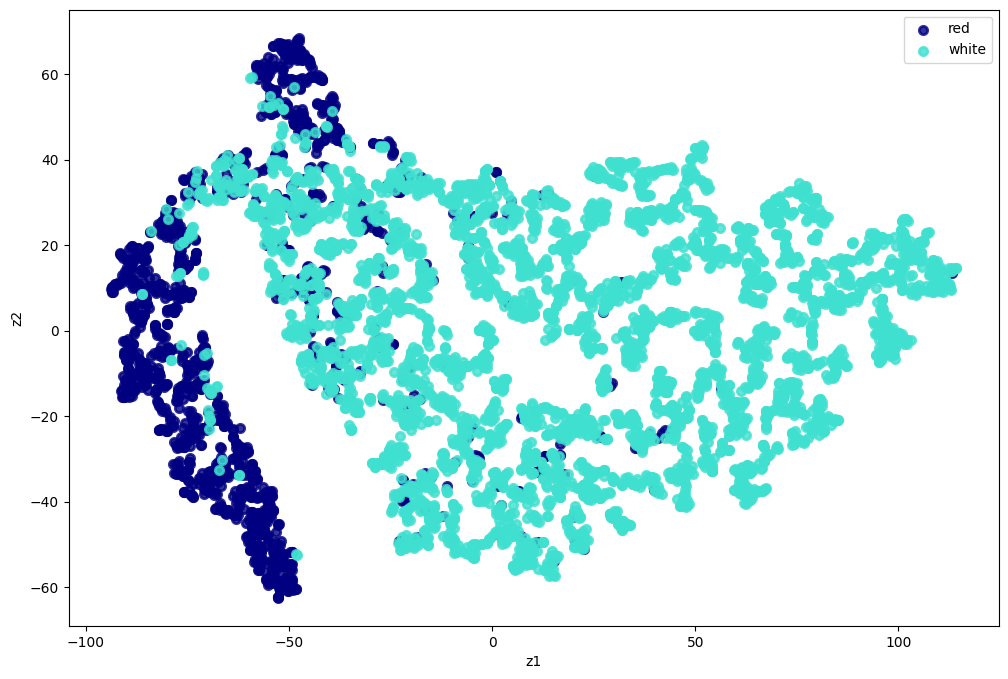

In [53]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Поиск выбросов. DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [95]:
dbscan_cluster1 = DBSCAN(eps = 16.0, min_samples = 500)
X_new = dbscan_cluster1.fit(X)

In [96]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 1014
v_measure = 0.3914319218271736


In [ ]:
'''
**Вывод результатов** показывает важные метрики для оценки кластеризации, выполненной с использованием алгоритма DBSCAN. Давайте проанализируем каждую метрику:

1. **Number of Clusters**:
   - `labels=dbscan_cluster1.labels_` извлекает метки кластеров, присвоенные каждому образцу в данных после выполнения алгоритма DBSCAN.
   - `N_clus=len(set(labels))-(1 if -1 in labels else 0)` подсчитывает общее количество уникальных меток (кластеров) в полученных результатах.
   - Если алгоритм обнаруживает шум (обозначает его меткой `-1`), то это значение вычитается из общего числа, так как шум не считается кластером.
   - Вывод показывает оценочное количество кластеров, выделенных алгоритмом, что позволяет понять, сколько групп данных было сформировано.

2. **Identify Noise**:
   - `n_noise = list(dbscan_cluster1.labels_).count(-1)` подсчитывает количество точек, которые были классифицированы как шум (`-1`).
   - Эти точки не принадлежат ни одному из кластеров, и их количество позволяет оценить, сколько данных не удалось интегрировать в какие-либо кластеры.
   - Этот показатель важен для понимания качества кластеризации и может дать представление о сложности структуры данных.

3. **Calculating v_measure**:
   - `print('v_measure =', v_measure_score(y, labels))` вычисляет V-measure, метрику, используемую для оценки качества кластеризации.
   - V-measure основывается на двух аспектах: "заполненности" (completeness) и "однородности" (homogeneity).
     - **Заполненность** измеряет, насколько хорошо все объекты одного класса сгруппированы в один кластер.
     - **Однородность** показывает, насколько хорошо кластер состоит из объектов одного класса.
   - Значение V-measure варьируется от 0 до 1, где 1 означает идеальное соответствие между истинными классами (маркеры `y`) и предсказанными кластерами (метки `labels`). Эта метрика полезна для оценки точности кластеризации по сравнению с известными метками классов.

Каждая из этих метрик предоставляет ценные сведения об процессе кластеризации, помогая оценить, как хорошо данные были сгруппированы алгоритмом DBSCAN и насколько качественно были выделены кластеры по сравнению с известными классами.

'''

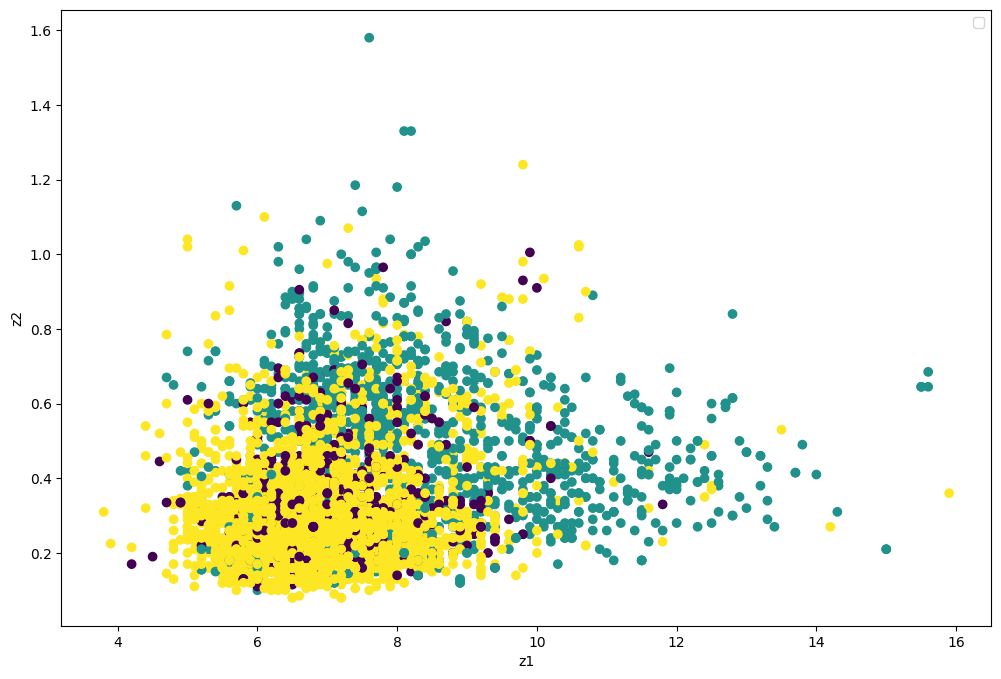

In [97]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.scatter(
        X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [73]:
from sklearn.neighbors import NearestNeighbors

# Определяем минимальное количество образцов для алгоритма
min_samples = 500

# Создаем объект NearestNeighbors с заданным количеством соседей и метрикой 'l2' (евклидово расстояние)
knn = NearestNeighbors(n_neighbors=min_samples, metric='l2')

# Обучаем модель на данных X, чтобы она могла находить ближайших соседей
knn.fit(X)

# Находим расстояния до ближайших соседей и их индексы
# dists - массив расстояний, inds - массив индексов ближайших соседей
dists, inds = knn.kneighbors(X)

# Выбираем расстояния до ближайших k-1 соседей (исключая саму точку)
# Вычисляем среднее значение расстояний для каждого образца и сохраняем в массиве dists_ar
dists_ar = dists[:, 1:min_samples].mean(axis=1)

# Сортируем массив средних расстояний в порядке возрастания
dists_ar.sort()

In [62]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

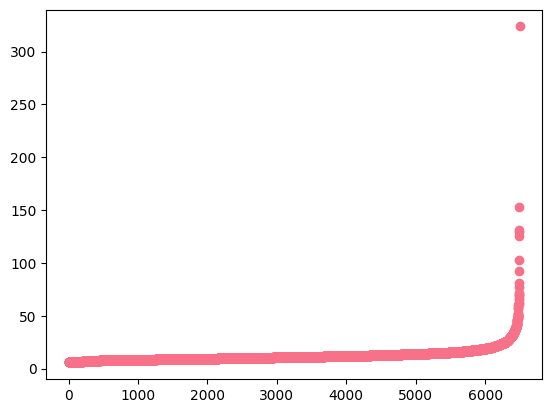

In [74]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

лучшее значение eps  будет 16

DBSCAN для определения выбросов

In [98]:
dbscan = DBSCAN(eps = 16.0, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=16.0, min_samples=500)


In [99]:
pred = dbscan.fit_predict(X)

In [100]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 1014
v_measure = 0.3914319218271736


In [101]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

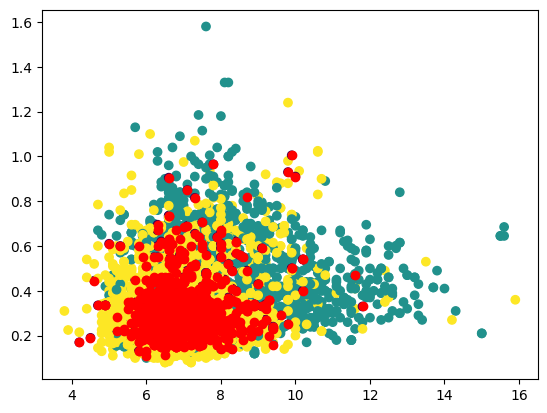

In [102]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()